In [8]:
import pdb
import numpy as np
import os
import readcol
import math
import cPickle as pickle
import pylab as plt
import pandas as pd
from utils import find_nearest
from utils import find_nearest_index
from skymaps import Skymaps
from skymaps import Field_catalogs
%matplotlib inline  

In [75]:
z_lo = np.array([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5])
z_hi = np.array([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0])
z_nodes = np.array([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0])
z_mid = (z_nodes[:-1] + z_nodes[1:])/2
nz = len(z_nodes) - 1

m_lo = np.array([8.5, 9.5,10.0,10.5,11.0])
m_hi = np.array([9.5,10.0,10.5,11.0,13.0])
m_nodes = np.array([8.5, 9.5,10.0,10.5,11.0,13.0])
m_mid = (m_nodes[:-1] + m_nodes[1:])/2
nm = len(m_nodes) - 1

In [88]:
#READ CATALOG
path_seds = '/data/maps_cats_models/catalogs/UVISTA/Muzzin13/K-Selected/'
path_catalog = '/data/maps_cats_models/catalogs/UVISTA/'
file_catalog = 'UVISTA_final_v4.1_zCOSMOS_zEAZY_RFcolors_IDs_mass_AGN_SFRs_parentids.csv'

In [5]:
tbl = pd.read_table(path_catalog+file_catalog,sep=',')

In [76]:
uVista = Field_catalogs(tbl)
uVista.separate_sf_qt()
#uVista.get_sf_qt_mass_redshift_bins(z_nodes,m_nodes)

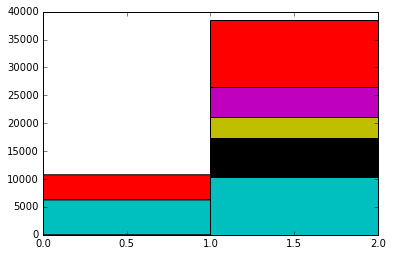

In [58]:
bins = range(3)
parent_splits = np.zeros([len(uVista.table['parent'].unique()),3])
for i in uVista.table['parent'].unique():
    x,y=np.histogram(uVista.table[uVista.table.parent == i].sfg,bins=bins)
    parent_splits[i,0] = i
    parent_splits[i,1:] = x
    plt.hist(uVista.table[uVista.table.parent == i].sfg,bins=bins)
    #plt.title(i)
plt.show()

parent_splits = parent_splits[parent_splits[:,2].argsort()[::-1]]

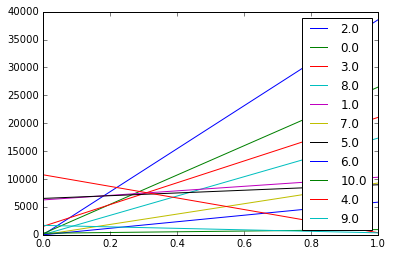

In [66]:
for i in range(len(uVista.table['parent'].unique())):
    #print i
    #print parent_splits[i,1:]
    #plt.hist(parent_splits[i,1:],bins=bins)
    plt.plot(bins[:2],parent_splits[i,1:],label=parent_splits[i,0])
    plt.legend()
    #plt.title(i)
plt.show()

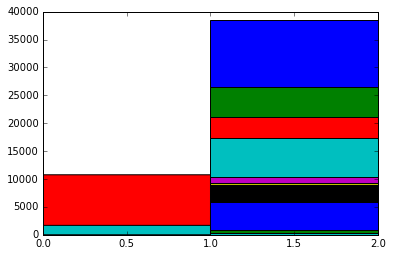

In [74]:
for i in parent_splits[:,0]:
    plt.hist(uVista.table[uVista.table.parent == i].sfg,bins=bins)
    #plt.title(i)
plt.show()

In [116]:
print uVista.table.parent.unique()
print uVista.table.parent_id.unique()
#uVista.table

[ 6  7  2 10  0  3  8  5  9  4  1]
[ 94429  11749  48388   5185  48069 101727  95167  85762  99172  99560
 235244]


[ 94429  11749  48388   5185  48069 101727  95167  85762  99172  99560
 235244]


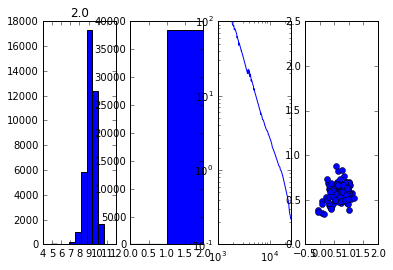

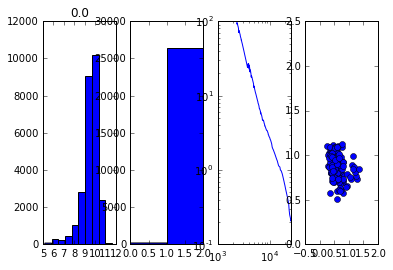

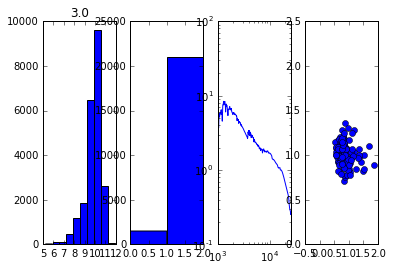

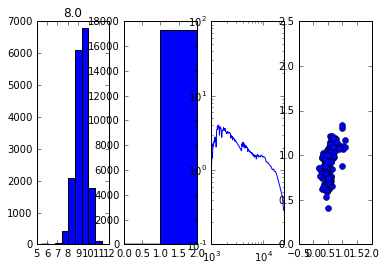

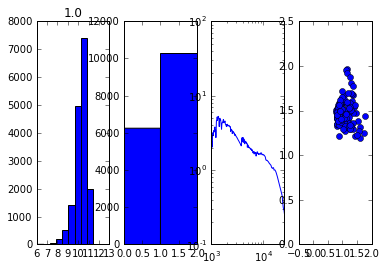

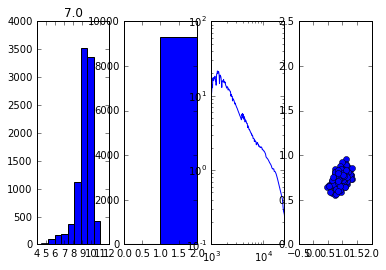

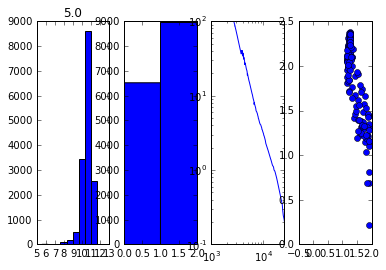

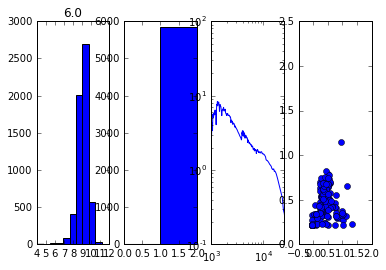

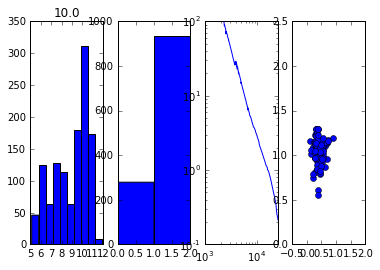

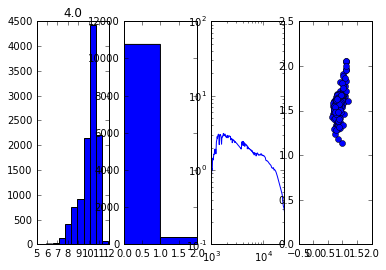

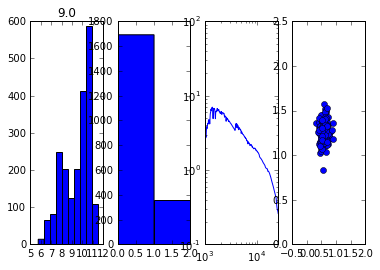

In [141]:
prange = 150
pid = uVista.table.parent_id.unique()
print pid
for i in parent_splits[:,0]:
    #print i
    fig = plt.figure()
    ax1 = fig.add_subplot(141)
    ax1.hist(uVista.table[uVista.table.parent == i].LMASS)#,bins=parents)
    plt.title(i)
    
    ax2 = fig.add_subplot(142)
    ax2.hist(uVista.table[uVista.table.parent == i].sfg,bins=bins)

    
    ax3 = fig.add_subplot(143)
    ax3.set_xlim(1e3,2.5e4)
    ax3.set_ylim(1e-1,1e2)

    idi = str(uVista.table[uVista.table.parent == i].parent_id.unique()[0])
    #print idi

    file_sedi = 'UVISTA_final_v4.1_'+str(int(idi))+'.fit'
    xi, yi= readcol.readcol(path_seds+file_sedi,twod=False, skipline=1)
    xnorm = find_nearest_index(16000,xi)
    ax3.loglog(xi,yi/yi[xnorm])
    #ax3.title(idi)
    
    ax4 = fig.add_subplot(144)
    ax4.set_xlim(-0.5,2)
    ax4.set_ylim(0,2.5)
    ax4.plot(uVista.table.rf_V_J[uVista.table.parent == i].values[:prange],tbl.rf_U_V[uVista.table.parent == i].values[:prange],'o')
plt.show()

[ 94429  11749  48388   5185  48069 101727  95167  85762  99172  99560
 235244]
48388
48069
101727
95167
235244
11749
85762
94429
5185
99560
99172


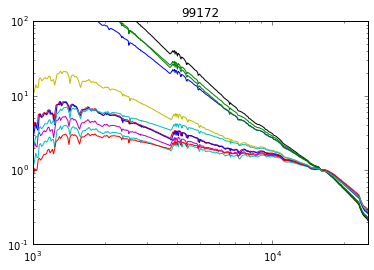

In [138]:
pid = uVista.table.parent_id.unique()
print pid
for i in parent_splits[:,0]:
    idi = str(uVista.table[uVista.table.parent == i].parent_id.unique()[0])
    print idi

    plt.xlim(1e3,2.5e4)
    plt.ylim(1e-1,1e2)
    file_sedi = 'UVISTA_final_v4.1_'+str(int(idi))+'.fit'
    xi, yi= readcol.readcol(path_seds+file_sedi,twod=False, skipline=1)
    xnorm = find_nearest_index(16000,xi)
    plt.loglog(xi,yi/yi[xnorm])
    plt.title(idi)
    
plt.show()